## Contour plot of the primary black hole mass (m1 ) versus the secondary black hole mass (m2 ) for a theoretically generated sample of binary black hole mergers.



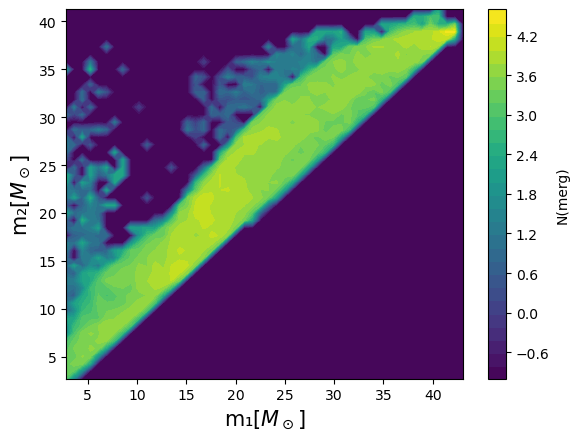

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Dec 22 15:11:35 2019

@author: astro
"""

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

f1=str('time_BHillustris1_30.dat')

x=np.genfromtxt(f1,comments="#",dtype="float",usecols=(6),unpack=True)  
y=np.genfromtxt(f1,comments="#",dtype="float", usecols=(7), unpack=True)                
#reads only columns 7 and 8

for k in range(len(x)):
    if (y[k]>x[k]):
        y[k], x[k] = x[k], y[k]
#if the 1st column is smaller then change values with the other one  
        
N= 50
m1 = np.linspace(min(x), max(x), num=N) #linspace for creating numeric sequences.(start,stop,num_range)

dm1 = m1[1] - m1[0] #see above max-min

m2 = np.linspace(min(y), max(y), num=N) #linspace for creating numeric sequences.(start,stop,num_range)

dm2 = m2[1] - m2[0] #see above max - min 

z = np.zeros((N, N)) #array.

for bh1, bh2 in zip(np.array(x) - min(x), np.array(y)- min(y)): #for loop with two variable (x,y )
    i = int(bh1/dm1)
    j = int(bh2/dm2)
    z[i,j]+=1

for i in range(N):
    for j in range(N):
        if(z[i,j]<=0.0):
            z[i,j]=0.1
        z[i,j]=np.log10(z[i,j]) # transforms z to log scale

cs=plt.contourf(m1, m2, z, 30, cmap=cm.viridis)
"""
# The last letter 'f' stands for 'filled' while plt.contour produces unfilled contour lines 
z: a two dimensional array-like object of size n × m. The values over which the contour is drawn.
m1 and m2 represent the coordinates of the values in z. m1 and m2 must both be 2D arrays with the same shape as z
cmap: string. Sets the color map. 

"""
# set color bar
cbar=plt.colorbar(cs,orientation='vertical') 
#plt.colorbar, which is needed to generate a color bar for the contour plot.
cbar.set_label('N(merg)', rotation=90)

cbar.solids.set_edgecolor("face")

plt.xlabel('m\N{SUBSCRIPT ONE}[$M_\odot$]', fontsize=15)

plt.ylabel('m\N{SUBSCRIPT TWO}[$M_\odot$]', fontsize=15)

plt.show()
